# Homework 6, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [3]:
!ls

Dataset TWO - Dogs.ipynb
NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx
boro_population.csv
zipcodes-neighborhoods.csv


In [4]:
import pandas as pd
pd.options.display.max_colwidth = None

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [90]:
excel_data_df = pd.read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx', sheet_name='Sheet1', na_values=[0, 'UNKNOWN', 'UNK', 'NS', 'UNKN', 'unknown', 'Unknown'])  
    
excel_data_df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [88]:
excel_data_df.shape
#81937 rows in total

(81937, 15)

In [20]:
excel_data_df.dtypes

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

Each row is a dog's licence applied and issued. 

1. Owner Zip Code is Zip Code the owner lives in
2. Guard or Trained shows if the dog were guard or trained.

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

1. How many licence were issued in the year 2017?
2. About how much percent of the dogs the owner applied for license were guard or trained?
3. What are the top 10 most common dog names?
4. What percent of the dogs are vaccinated?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [29]:
excel_data_df['Primary Breed'].value_counts(ascending = False).head(10)

Unknown                                 12894
Yorkshire Terrier                        5133
Shih Tzu                                 4727
Chihuahua                                3924
Maltese                                  2965
Labrador Retriever                       2872
American Pit Bull Terrier/Pit Bull       2153
American Pit Bull Mix / Pit Bull Mix     2029
Labrador Retriever Crossbreed            1864
Beagle                                   1438
Name: Primary Breed, dtype: int64

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

In [ ]:
otherbreed_df = excel_data_df[excel_data_df['Primary Breed']!='Unknown']

otherbreed_df['Primary Breed'].value_counts(ascending = False).head(10)

## What are the most popular dog names?

In [83]:
othername_df = excel_data_df[excel_data_df['Animal Name']!='UNKNOWN']
othername_df = othername_df[othername_df['Animal Name']!='unknown']

othername_df['Animal Name'].value_counts(ascending = False).head(1)

Bella    527
Name: Animal Name, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [34]:
othername_df[othername_df['Animal Name']=='Hongyu']
#Yeah!!! There's none!

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date


In [45]:
othername_df[othername_df['Animal Name']=='Max']['Animal Name'].value_counts()
#There are 515

Max    515
Name: Animal Name, dtype: int64

In [44]:
othername_df[othername_df['Animal Name']=='Maxwell']['Animal Name'].value_counts()
#There are 30

Maxwell    30
Name: Animal Name, dtype: int64

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [50]:
excel_data_df['Guard or Trained'].value_counts(normalize=True)
#Among all, only 0.1% of them are.

No     0.998971
Yes    0.001029
Name: Guard or Trained, dtype: float64

## What are the actual numbers?

In [56]:
excel_data_df[excel_data_df['Guard or Trained']=='Yes']['Guard or Trained'].value_counts()
# 51 of them answered yes

Yes    51
Name: Guard or Trained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [53]:
excel_data_df['Guard or Trained'].value_counts(dropna=False)
#They are NAN

No     49525
NaN    32361
Yes       51
Name: Guard or Trained, dtype: int64

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [163]:
excel_data_df['Guard or Trained'] = excel_data_df['Guard or Trained'].fillna('No')

In [55]:
excel_data_df['Guard or Trained'].value_counts(dropna=False)

No     81886
Yes       51
Name: Guard or Trained, dtype: int64

## What are the top dog breeds for guard dogs? 

In [63]:
guard_df = otherbreed_df[otherbreed_df['Guard or Trained']=='Yes']

In [64]:
guard_df['Primary Breed'].value_counts(ascending = False).head(10)

German Shepherd Dog                     4
Chihuahua                               3
Labrador Retriever                      3
Rottweiler                              3
American Pit Bull Mix / Pit Bull Mix    3
Shih Tzu                                2
Staffordshire Bull Terrier              2
Poodle, Standard                        1
Beagle Crossbreed                       1
Weimaraner                              1
Name: Primary Breed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [65]:
Birth = excel_data_df['Animal Birth'].apply(lambda birth: birth.year)
excel_data_df['Year'] = Birth
excel_data_df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [66]:
Age = 2022 - excel_data_df['Year']
excel_data_df['Age'] = Age
excel_data_df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,Age
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,15
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,9
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,8
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,14
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,8


In [69]:
excel_data_df['Age'].mean()

12.341848005174707

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [70]:
zip_df = pd.read_csv("zipcodes-neighborhoods.csv")
zip_df.head()

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx


In [140]:
zip_df.columns = zip_df.columns.str.replace('zip', 'Owner Zip Code')
zip_df

,neighborhood,Owner Zip Code,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx
...,...,...,...
173,South Shore,10312,Staten Island
174,Stapleton and St. George,10301,Staten Island
175,Stapleton and St. George,10304,Staten Island
176,Stapleton and St. George,10305,Staten Island


In [141]:
join_df = pd.merge(excel_data_df, zip_df, how="left", on=["Owner Zip Code"])
join_df
# This joined table should be enough?

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,neighborhood,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,Upper West Side,Manhattan
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,Southeast Bronx,Bronx
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,Greenwich Village and Soho,Manhattan
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,Upper West Side,Manhattan
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,Greenwich Village and Soho,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81932,10001,Cheeseburger,M,Pug,NaN,Fawn,NaN,NaN,2013-01-01,Yes,NaN,Yes,2016-04-28 15:11:18.533,2016-04-28,2017-04-28,Chelsea and Clinton,Manhattan
81933,10021,Jack,M,NaN,NaN,Cream,NaN,NaN,2015-07-01,Yes,NaN,Yes,2016-04-28 15:12:22.150,2016-04-28,2017-04-28,Upper East Side,Manhattan
81934,10032,Petunia,F,Lhasa Apso,NaN,GOLD,BLACK,WHITE,2009-11-01,Yes,No,Yes,2016-04-28 15:18:14.240,2016-04-28,2018-02-18,Inwood and Washington Heights,Manhattan
81935,10310,Max,M,Cocker Spaniel,NaN,WHITE,BROWN,NaN,2006-04-01,Yes,No,Yes,2016-04-28 15:18:44.520,2016-04-28,2017-06-19,Port Richmond,Staten Island


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [143]:
# This gets to Bronx
localdog_df = join_df[join_df["borough"] == 'Bronx']
localdog_df['Animal Name'].value_counts(dropna=True, ascending = False).head(1)

Rocky    60
Name: Animal Name, dtype: int64

In [144]:
localdog_df = join_df[join_df["borough"] == 'Brooklyn']
localdog_df['Animal Name'].value_counts(dropna=True, ascending = False).head(1)

Max    113
Name: Animal Name, dtype: int64

In [146]:
localdog_df = join_df[join_df["neighborhood"] == 'Upper East Side']
localdog_df['Animal Name'].value_counts(dropna=True, ascending = False).head(1)

Lucy    40
Name: Animal Name, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [189]:
boroughs = join_df['borough'].unique()
boroughs
#Don't know how to deal with the null value in this one.

array(['Manhattan', 'Bronx', 'Brooklyn', 'Staten Island', 'Queens', nan],
      dtype=object)

In [192]:
for borough in boroughs[0:5]:
    local_df = join_df[join_df["borough"] == borough]
    print(borough)
    print(local_df['Primary Breed'].value_counts(dropna=True, ascending = False).head(1))
    print("**********")

Manhattan
Yorkshire Terrier    1402
Name: Primary Breed, dtype: int64
**********
Bronx
Yorkshire Terrier    753
Name: Primary Breed, dtype: int64
**********
Brooklyn
Yorkshire Terrier    1316
Name: Primary Breed, dtype: int64
**********
Staten Island
Yorkshire Terrier    525
Name: Primary Breed, dtype: int64
**********
Queens
Yorkshire Terrier    1085
Name: Primary Breed, dtype: int64
**********


## What breed of dogs are the least likely to be spayed? Male or female?

In [130]:
spayed_df = excel_data_df[excel_data_df['Spayed or Neut'] == 'No']
spayed_df['Primary Breed'].value_counts(dropna=True, ascending = False).head(1)
#This shows the primary breed of dog

Yorkshire Terrier    1562
Name: Primary Breed, dtype: int64

In [131]:
spayed_df['Animal Gender'].value_counts(dropna=True, ascending = False).head()
#This shows that Male are more least likely to be spayed.

M    9914
F    5808
Name: Animal Gender, dtype: int64

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

## How many dogs are in each borough? Plot it in a graph.

<AxesSubplot: >

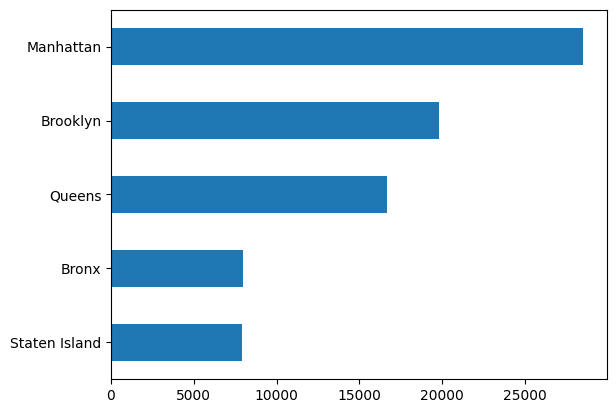

In [161]:
join_df.borough.value_counts(ascending = True).plot(kind='barh')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [166]:
pop_df = pd.read_csv("boro_population.csv")
pop_df.head()

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [207]:
dogpercap = {}
for borough in boroughs[0:5]:
    dogpop = join_df[join_df['borough']==borough].count()['Owner Zip Code'].astype(int)
    dogpercap[borough] = dogpop / pop_df[pop_df['borough']=='Bronx']['population'].astype(int)

dogpercap
#loop everything into a dictionary with the borough and percapita

{'Manhattan': 1    0.019606
 Name: population, dtype: float64,
 'Bronx': 1    0.005463
 Name: population, dtype: float64,
 'Brooklyn': 1    0.013594
 Name: population, dtype: float64,
 'Staten Island': 1    0.005421
 Name: population, dtype: float64,
 'Queens': 1    0.011471
 Name: population, dtype: float64}

In [209]:
max(dogpercap)
#Staten Island has the highest per capita level

'Staten Island'

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

## What percentage of dogs are not guard dogs?

In [164]:
excel_data_df['Guard or Trained'].value_counts(normalize=True)

No     0.999378
Yes    0.000622
Name: Guard or Trained, dtype: float64